# DSA3101 Lecture 1 Hands On Activity: Glassdoor Data Science Jobs Data Cleaning and Initial Exploration

## Background

This dataset was scraped from Glassdoor.com, one of the world’s largest job and career sites. It contains data science-related job postings, including salary estimates, job roles, locations, company ratings, and other metadata that can be useful for job market analysis.

Raw data often contains missing values, typos, inconsistent formatting, or irrelevant columns. Cleaning your data improves the quality of analysis and modeling.

## 🎯 Objectives
In this activity, you will:

### Perform data cleaning

- Handle missing or inconsistent values

- Detect and remove duplicate rows

- Parse and convert salary information

- Standardise categorical fields (e.g., job titles, seniority)

### Explore the cleaned data to answer key questions:

Q1: What is the relationship between company rating and the average salary offered?

Q2: Which job position has the highest expected average salary?

Q3: What are the most commonly required technical skills for data science roles (e.g., Python, SQL, AWS)?

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

## 1. Load and Inspect the Data

In [4]:
# Load the uncleaned dataset
df = pd.read_csv("Uncleaned_DS_jobs1.csv")

# Print the number of rows and columns in the DataFrame
print(df.shape) 

# Display the first 5 rows of the DataFrame to get a quick look at the data
df.head()


(672, 15)


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.drop(columns='index', inplace=True)
print(df.shape) 

KeyError: "['index'] not found in axis"

In [8]:
# Show a summary of the DataFrame, including column names, data types, and non-null counts
df.info()

# Generate descriptive statistics for numerical columns (mean, std, min, max, etc.)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.6+ KB


,Rating,Founded
count,672.000000,672.000000
mean,3.518601,1635.529762
std,1.410329,756.746640
min,-1.000000,-1.000000
25%,3.300000,1917.750000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


In [9]:
# Check for duplicate rows excluding the index
duplicates = df.duplicated(keep=False)

# View duplicate rows (if any)
df[duplicates]


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
131,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million (USD),-1
134,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
136,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million (USD),-1
357,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
358,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
359,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
360,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
df = df.drop_duplicates(keep='first')
print(df.shape) 

(659, 14)


## 2. Fixing Column Names

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')


## 3. Handling Missing Values

In [12]:
df.isnull().sum().sort_values(ascending=False) 

#Our missing values are represented as -1 in this case
df.replace('-1', None, inplace=True) # for text
df.replace(-1, pd.NA, inplace=True) # for numeric

df.head()

C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\3096766483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-1', None, inplace=True) # for text
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\3096766483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, pd.NA, inplace=True) # for numeric


,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),None
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),None
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## 4. Data Cleaning

In [14]:
# Fixing Text Columns
df['company_name'] = df['company_name'].str.extract(r'^(.*?)(?:\n|$)', expand=False).str.strip()

C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\282394609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name'] = df['company_name'].str.extract(r'^(.*?)(?:\n|$)', expand=False).str.strip()


In [15]:
# Clean 'salary_estimate' and extract min and max salaries
df['salary_estimate'] = df['salary_estimate'].str.replace(r'\(.*\)', '', regex=True)

# Remove 'K' and '$', then split into min and max salary
df[['min_salary', 'max_salary']] = (
    df['salary_estimate']
    .str.replace('K', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.split('-', expand=True)
)

# Convert to numeric and scale to full numbers
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce') * 1000
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce') * 1000

# Compute average salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2


C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\1611901269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_estimate'] = df['salary_estimate'].str.replace(r'\(.*\)', '', regex=True)
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\1611901269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['min_salary', 'max_salary']] = (
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\1611901269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [16]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),None,137000,171000,154000.0
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),None,137000,171000,154000.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0


In [17]:
# create state column
def extract_state(location):
    if pd.isna(location) or ',' not in location:
        return 'unknown'
    return location.split(',')[1].strip()

df['state'] = df['location'].apply(extract_state)


C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\313161608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['location'].apply(extract_state)


In [18]:
# Add company age (from Founded)
current_year = datetime.now().year

print(current_year)

# Add company age (from Founded)
current_year = datetime.now().year
df['company_age'] = df['founded'].apply(lambda x: current_year - x if pd.notnull(x) and x > 0 else None)

# Remove Founded column
df.drop(columns=['founded'], inplace=True)

df.head()

2025


C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\4167471131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_age'] = df['founded'].apply(lambda x: current_year - x if pd.notnull(x) and x > 0 else None)
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\4167471131.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['founded'], inplace=True)


,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary,state,company_age
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,NY,32.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),None,137000,171000,154000.0,VA,57.0
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),None,137000,171000,154000.0,MA,44.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,MA,25.0
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,NY,27.0


## 5. Feature Engineering

In [19]:
df['job_title'].value_counts()

job_title
Data Scientist                                                      326
Data Engineer                                                        26
Senior Data Scientist                                                19
Machine Learning Engineer                                            15
Data Analyst                                                         12
                                                                   ... 
Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics      1
Developer III - Data Science                                          1
Hydrogen/Tritium Materials Scientist (Experienced)                    1
Data Scientist/Data Analytics Practitioner                            1
AI/ML - Machine Learning Scientist, Siri Understanding                1
Name: count, Length: 172, dtype: int64

In [20]:
# Define a function to simplify job titles into common categories
def simplify_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'machine learning' in title:
        return 'mle'  # machine learning engineer
    else:
        return 'others'

# Apply the simplification function to the 'job_title' column
df['job_title_simplified'] = df['job_title'].apply(simplify_job_title)


# Define a function to extract seniority level from job title
def extract_seniority(title):
    title = title.lower()
    if any(word in title for word in ['senior', 'sr']):
        return 'senior'
    elif any(word in title for word in ['lead', 'principal']):
        return 'lead'
    elif any(word in title for word in ['junior', 'jr', 'jr.']):
        return 'junior'
    else:
        return 'others'

# Apply the seniority function to the 'job_title' column
df['job_seniority'] = df['job_title'].apply(extract_seniority)


C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\718686855.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title_simplified'] = df['job_title'].apply(simplify_job_title)
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\718686855.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_seniority'] = df['job_title'].apply(extract_seniority)


In [119]:
df['job_title_simplified'].value_counts()

job_title_simplified
data scientist    455
others             79
analyst            55
data engineer      47
mle                36
Name: count, dtype: int64

In [21]:
skills = ['python', 'sql', 'git', 'docker', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big data']

for skill in skills:
    col_name = f"skill_{skill.replace(' ', '_')}"
    df[col_name] = df['job_description'].str.contains(skill, case=False, na=False).astype(int)



C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\463381237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df['job_description'].str.contains(skill, case=False, na=False).astype(int)
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\463381237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df['job_description'].str.contains(skill, case=False, na=False).astype(int)
C:\Users\yoann\AppData\Local\Temp\ipykernel_17400\463381237.py:5: SettingWithCopyWarning: 
A value is tryi

In [22]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,...,skill_python,skill_sql,skill_git,skill_docker,skill_excel,skill_hadoop,skill_spark,skill_aws,skill_tableau,skill_big_data
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,0,0,0,0,0,0,0,1,0,0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,0,1,0,0,0,1,0,0,0,1
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,1,0,0,0,1,0,0,1,0,0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,1,1,1,0,1,0,0,1,0,0
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,1,1,0,0,1,0,0,0,0,0


## 6. Data Exploration

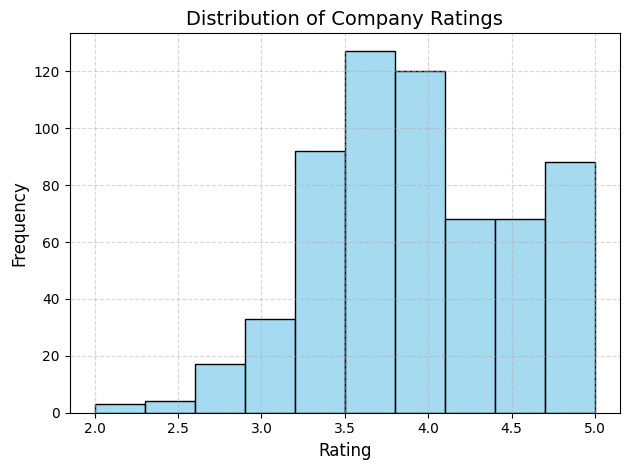

In [23]:
# Rating Distribution
sns.histplot(data=df, x='rating', bins=10, kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Company Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


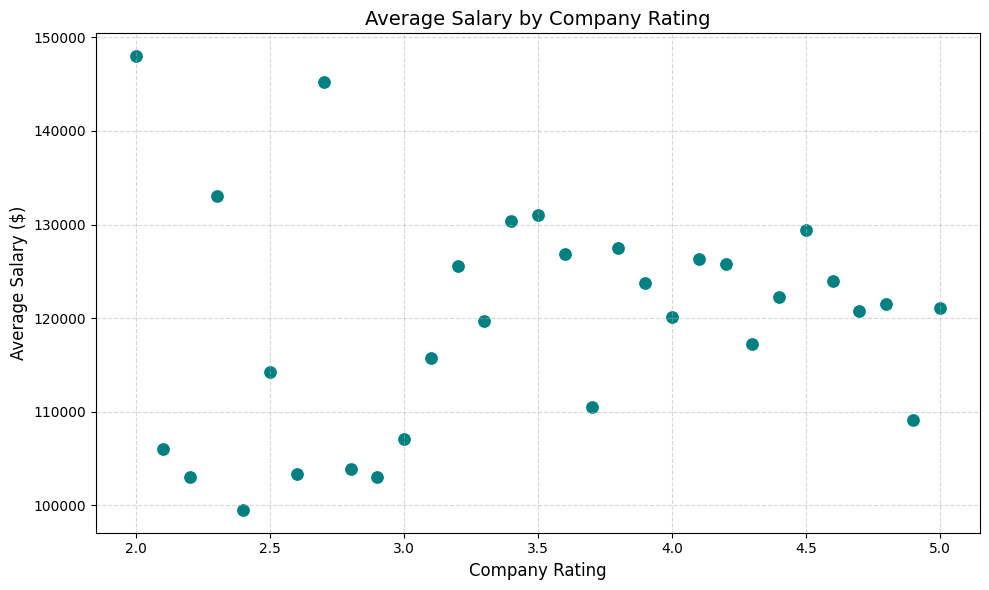

In [26]:
# Group and compute average salary by rating
avg_salary_by_rating = df.groupby('rating')['avg_salary'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_salary_by_rating, x='rating', y='avg_salary', color='teal', s=100)

# Beautify
plt.title('Average Salary by Company Rating', fontsize=14)
plt.xlabel('Company Rating', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

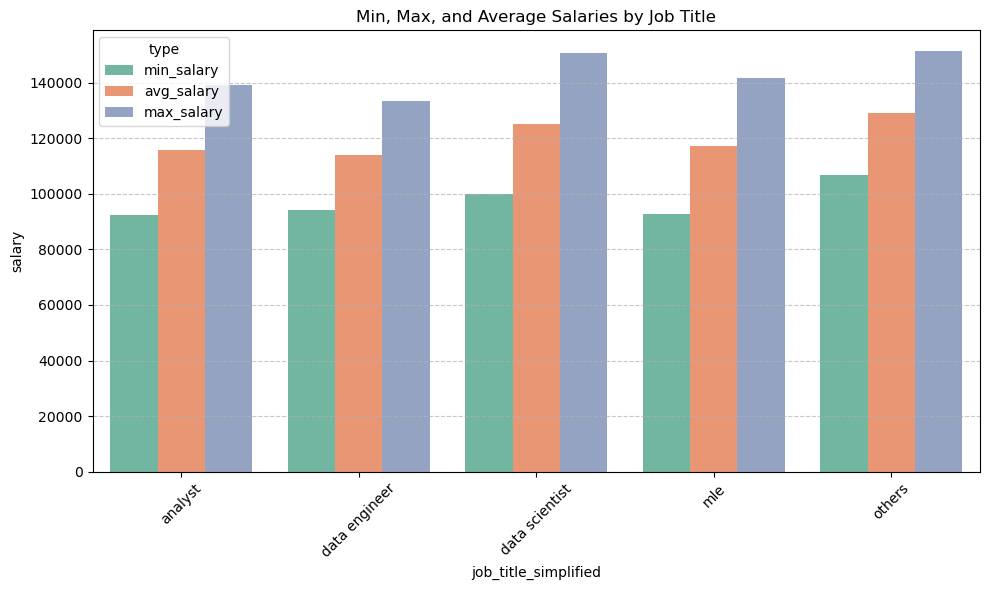

In [123]:
# Explore Salary Range based on Job Title
# Prepare the data
salary = df.groupby('job_title_simplified')[['min_salary', 'avg_salary', 'max_salary']].mean().round().reset_index()
salary = salary.melt(id_vars='job_title_simplified', var_name='type', value_name='salary')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=salary, x='job_title_simplified', y='salary', hue='type', palette='Set2')

plt.title('Min, Max, and Average Salaries by Job Title')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal dashed lines
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TRY ME: plot salary based on job seniority

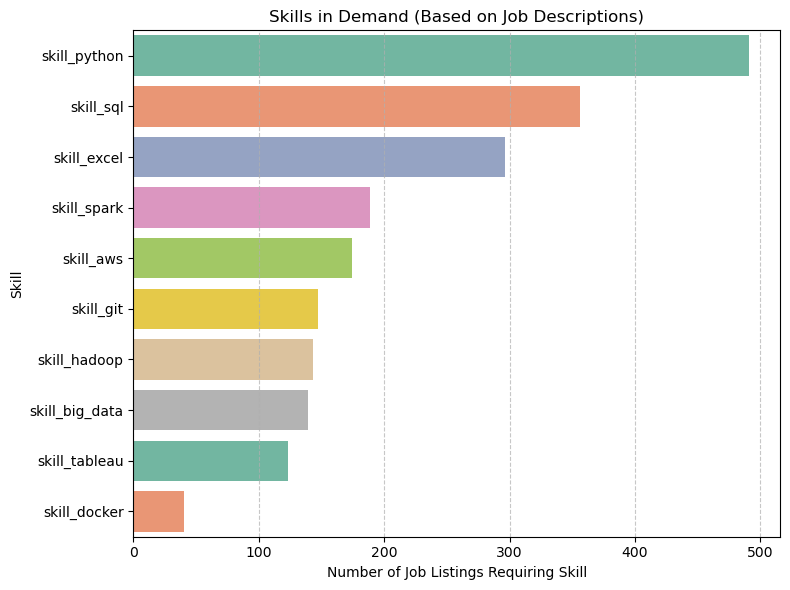

In [141]:
# Explore skills on demand
# Select skill columns
skill_cols = [col for col in df.columns if col.startswith('skill_')]

# Sum the skill occurrences
skill_counts = df[skill_cols].sum().sort_values(ascending=False)  # descending for horizontal plot

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, hue=skill_counts.index, dodge=False, palette='Set2', legend=False)


plt.title('Skills in Demand (Based on Job Descriptions)')
plt.xlabel('Number of Job Listings Requiring Skill')
plt.ylabel('Skill')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
## 7. Save Clean Dataset

In [ ]:
df_cleaned.to_csv("DSA3101_Cleaned_DS_jobs1.csv", index=False)
